In [10]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

IGRAPH U-W- 6 14 -- 
+ attr: id (v), weight (e)


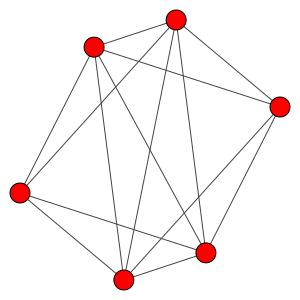

In [4]:
user_net = ig.read("user-user.gml")
print(user_net.summary())
ig.plot(user_net, bbox=(300,300))

IGRAPH U-W- 6 11 -- 
+ attr: id (v), weight (e)


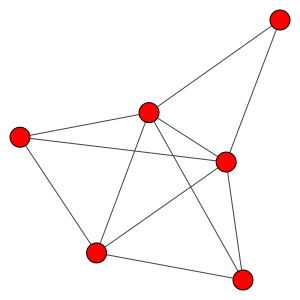

In [16]:
res_net = ig.read("res-res.gml")
print(res_net.summary())
ig.plot(res_net, bbox=(300,300))

In [101]:
# Re-order columns by user attributes and resources attributes
user_attr = ['role', 'specialty', 'team', 'uward', 'agentfor']
rsrc_attr = ['type', 'patient', 'treatingteam', 'oward', 'author', 'topic']
print("# User attr:", len(user_attr))
print("# Rsrc attr:", len(rsrc_attr))
print()

##### Load positive access log. #####
url_file = "../00-Data/hc-positive.csv"
df = pd.read_csv(url_file)
df = df[df.columns[:-1]].drop_duplicates()
print("***** POSITIVE HC *****")
print("Columns: ", df.columns)
print("Length: ", len(df))
print(df.info())
print(df.head(5))# LOAD DATA
url_file = "../00-Data/train.csv"
df_data = pd.read_csv(url_file)
print("Data loaded!")
print(df_data.info())

# User attributes
user_attrs = df_data.columns[2:]

# Number of users
n_users = len(df_data[user_attrs].drop_duplicates())
n_rsrcs = len(df_data.RESOURCE.drop_duplicates())
print("|U|: ", n_users) # Unique users
print("|R|: ", n_rsrcs) # Unique resources

print()
df_pos_entries = df_data[df_data.ACTION==1]
df_neg_entries = df_data[df_data.ACTION==0]
print('Num positive entries:',len(df_pos_entries), 
    "{:.4}%".format((len(df_pos_entries)/len(df_data))*100))
print('Num negative entries:',len(df_neg_entries),
    "{:.4}%".format((len(df_neg_entries)/len(df_data))*100))

##### ***** Cross-Validation Configuration ***** #####
k = 10
test_size = 0.2
kfold = StratifiedShuffleSplit(n_splits=k, test_size=test_size, random_state=1)

data_partition = kfold.split(df_data, df_data.ACTION)
data_corpus = [] # Lista donde se almacenan los k fols

for train_data, test_data in data_partition:        
    X_train, X_test = df_data.iloc[train_data], df_data.iloc[test_data]
    data_corpus.append([X_train, X_test])

print("Done!")
print(); print()


# User attr: 5
# Rsrc attr: 6

***** POSITIVE HC *****
Columns:  Index(['action', 'role', 'type', 'oward', 'uward', 'team', 'treatingteam',
       'patient', 'author', 'topic', 'specialty', 'agentfor'],
      dtype='object')
Length:  8735
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8735 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   action        8735 non-null   int64 
 1   role          8735 non-null   object
 2   type          8735 non-null   object
 3   oward         8735 non-null   object
 4   uward         8735 non-null   object
 5   team          8735 non-null   object
 6   treatingteam  8735 non-null   object
 7   patient       8735 non-null   object
 8   author        8735 non-null   object
 9   topic         8735 non-null   object
 10  specialty     8735 non-null   object
 11  agentfor      8735 non-null   object
dtypes: int64(1), object(11)
memory usage: 887.1+ KB
None
   actio

In [102]:
df_train_k = data_corpus[0][0]
df_test_k = data_corpus[0][1]

df_train_k

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
17261,1,77500,7459,5110,117954,122672,125751,135104,118870,125753
16696,1,79121,225257,120342,120343,119076,118422,311236,118424,118425
5664,1,20364,22504,117961,118300,123055,120344,128788,118424,120346
4784,1,33146,1728,117961,118327,118507,121527,128634,118398,121529
28797,1,39151,54684,117961,117962,118910,118777,279443,308574,118779
...,...,...,...,...,...,...,...,...,...,...
8429,1,34223,6216,117961,118327,118328,118641,306399,118643,118644
30678,1,42897,1030,117961,118343,120722,118361,118362,118363,118364
10476,1,74106,28890,117961,118327,125144,124775,209906,122032,124777
2831,1,20208,2299,117961,117962,119223,123045,118959,120518,123047


In [100]:
df_train_k = data_corpus[0][0]
df_test_k = data_corpus[0][1]

df_train_k.drop(['USERID'], axis=1)
# Create an index for every users

#print(user_dict)

# Create a new column to add in a DF
list_usr_idx = []
for log in df_train_k[user_attrs].values:
    key_id_atr = str(log)
    #key_idx = val_list.index(list(log))
    list_usr_idx.append(dict_user[key_id_atr])
print("|L'| :", len(list_usr_idx), " = |L| :", len(df_train_k))
df_train_k["USERID"] = list_usr_idx


|L'| : 26215  = |L| : 26215


In [64]:
df_train_k

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,USERID
17261,1,77500,7459,5110,117954,122672,125751,135104,118870,125753,84959
16696,1,79121,225257,120342,120343,119076,118422,311236,118424,118425,304378
5664,1,20364,22504,117961,118300,123055,120344,128788,118424,120346,42868
4784,1,33146,1728,117961,118327,118507,121527,128634,118398,121529,34874
28797,1,39151,54684,117961,117962,118910,118777,279443,308574,118779,93835
...,...,...,...,...,...,...,...,...,...,...,...
8429,1,34223,6216,117961,118327,118328,118641,306399,118643,118644,40439
30678,1,42897,1030,117961,118343,120722,118361,118362,118363,118364,43927
10476,1,74106,28890,117961,118327,125144,124775,209906,122032,124777,102996
2831,1,20208,2299,117961,117962,119223,123045,118959,120518,123047,22507


In [41]:
"".join([str(i) for i in u_attr])

'3610119062119091118042118563118563270488118565'

In [15]:
df_train_k[user_attrs].drop_duplicates().index

,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
17261,7459,5110,117954,122672,125751,135104,118870,125753
16696,225257,120342,120343,119076,118422,311236,118424,118425
5664,22504,117961,118300,123055,120344,128788,118424,120346
4784,1728,117961,118327,118507,121527,128634,118398,121529
28797,54684,117961,117962,118910,118777,279443,308574,118779
...,...,...,...,...,...,...,...,...
11354,58954,118079,118080,117878,117879,304519,19721,117880
23421,6340,118114,118115,117941,118568,119907,19721,118570
32117,6137,117961,118225,119924,118636,141441,118638,118639
2831,2299,117961,117962,119223,123045,118959,120518,123047


In [113]:
# Re-order columns by user attributes and resources attributes
user_attr = ['role', 'specialty', 'team', 'uward', 'agentfor']
rsrc_attr = ['type', 'patient', 'treatingteam', 'oward', 'author', 'topic']
print("# User attr:", len(user_attr))
print("# Rsrc attr:", len(rsrc_attr))
print()

##### Load positive access log. #####
url_file = "../00-Data/hc-negative.csv"
df = pd.read_csv(url_file)
df = df[df.columns[:-1]].drop_duplicates()
print("***** POSITIVE HC *****")
print("Columns: ", df.columns)
print("Length: ", len(df))
#print(df.info())
#print(df.head(5))
print(); print()
df.action.value_counts()

# User attr: 5
# Rsrc attr: 6

***** POSITIVE HC *****
Columns:  Index(['action', 'role', 'type', 'oward', 'uward', 'team', 'treatingteam',
       'patient', 'author', 'topic', 'specialty', 'agentfor', 'user'],
      dtype='object')
Length:  9000




addnote    2273
?          2259
additem    2243
read       2225
Name: action, dtype: int64